In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv2
import scipy.io
import random




In [2]:
unpack_double = lambda x: x[0][0]
unpack_single = lambda x: x[0]

def prepare_df(path, singles = [], doubles = []):
    annos = scipy.io.loadmat(path)['annotations']
    df = pd.DataFrame(annos[0])
    
    for item in singles:
        df[item] = df[item].apply(unpack_single)
    
    for item in doubles:
        df[item] = df[item].apply(unpack_double)

    return df[singles + doubles]

train = prepare_df('devkit/cars_train_annos', ['fname'], ['class'])
test = prepare_df('devkit/cars_test_annos', ['fname'])

train['name'] = train['fname'].apply(lambda name: 'cars_train/' + name)
test['name'] = test['fname'].apply(lambda name: 'cars_test/' + name)

del train['fname']
del test['fname']

train['class'] = train['class'].apply(lambda x: x-1)

meta = pd.DataFrame(scipy.io.loadmat('devkit/cars_meta.mat')['class_names'][0], columns=['class_name'])
meta['class_name'] = meta['class_name'].apply(unpack_single)

train['label'] = train['class'].apply(lambda x: meta.iloc[x].class_name)
del train['class']

In [3]:
train.head()


,name,label
0,cars_train/00001.jpg,Audi TTS Coupe 2012
1,cars_train/00002.jpg,Acura TL Sedan 2012
2,cars_train/00003.jpg,Dodge Dakota Club Cab 2007
3,cars_train/00004.jpg,Hyundai Sonata Hybrid Sedan 2012
4,cars_train/00005.jpg,Ford F-450 Super Duty Crew Cab 2012


In [4]:

make_of_label = train['label'].str.split()
make_labels = [row[0] for row in make_of_label]
train['make'] = make_labels



In [5]:
train.head()


,name,label,make
0,cars_train/00001.jpg,Audi TTS Coupe 2012,Audi
1,cars_train/00002.jpg,Acura TL Sedan 2012,Acura
2,cars_train/00003.jpg,Dodge Dakota Club Cab 2007,Dodge
3,cars_train/00004.jpg,Hyundai Sonata Hybrid Sedan 2012,Hyundai
4,cars_train/00005.jpg,Ford F-450 Super Duty Crew Cab 2012,Ford


In [6]:
train_2_makes = train[train['make'].isin(['Ford','Toyota'])]
train_2_makes.head()


,name,label,make
4,cars_train/00005.jpg,Ford F-450 Super Duty Crew Cab 2012,Ford
11,cars_train/00012.jpg,Toyota Sequoia SUV 2012,Toyota
44,cars_train/00045.jpg,Toyota Sequoia SUV 2012,Toyota
60,cars_train/00061.jpg,Ford F-150 Regular Cab 2007,Ford
63,cars_train/00064.jpg,Toyota Camry Sedan 2012,Toyota


In [7]:
%matplotlib inline



108
224


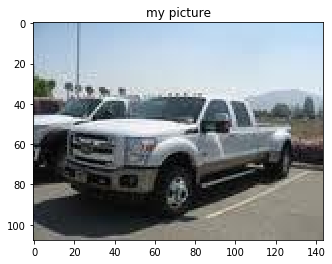

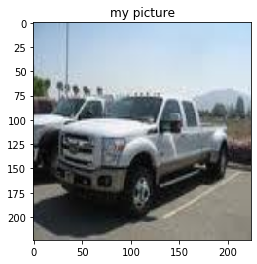

(224, 224, 3)


In [33]:

tr2 = train_2_makes[0:400]
te2 = train_2_makes[400:]

%matplotlib inline

file = 'cars_train/00005.jpg'
img = cv2.imread(file)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

print(len(img2))
img3 = cv2.resize(img2,(224, 224))
print(len(img3))


plt.imshow(img2)
plt.title('my picture')
plt.show()


plt.imshow(img3)
plt.title('my picture')
plt.show()

print(np.shape(img3))

In [47]:
X = []
for index, row in tr2.iterrows():
    file = row['name']
    print(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img,(224, 224))
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels = pixels.flatten()
    X.append(pixels)
    
    
print(np.shape(X))
    






cars_train/00005.jpg
cars_train/00012.jpg
cars_train/00045.jpg
cars_train/00061.jpg
cars_train/00064.jpg
cars_train/00067.jpg
cars_train/00073.jpg
cars_train/00074.jpg
cars_train/00075.jpg
cars_train/00077.jpg
cars_train/00080.jpg
cars_train/00084.jpg
cars_train/00090.jpg
cars_train/00094.jpg
cars_train/00116.jpg
cars_train/00121.jpg
cars_train/00148.jpg
cars_train/00166.jpg
cars_train/00175.jpg
cars_train/00192.jpg
cars_train/00197.jpg
cars_train/00203.jpg
cars_train/00214.jpg
cars_train/00220.jpg
cars_train/00226.jpg
cars_train/00231.jpg
cars_train/00235.jpg
cars_train/00259.jpg
cars_train/00280.jpg
cars_train/00288.jpg
cars_train/00324.jpg
cars_train/00329.jpg
cars_train/00336.jpg
cars_train/00338.jpg
cars_train/00345.jpg
cars_train/00353.jpg
cars_train/00356.jpg
cars_train/00403.jpg
cars_train/00409.jpg
cars_train/00416.jpg
cars_train/00427.jpg
cars_train/00431.jpg
cars_train/00440.jpg
cars_train/00441.jpg
cars_train/00451.jpg
cars_train/00452.jpg
cars_train/00458.jpg
cars_train/00

In [40]:
Y = np.zeros((400, 1))
Y = np.where(tr2['make'] == 'Ford', 1, 0)

In [48]:
testX = []
for index, row in te2.iterrows():
    file = row['name']
    print(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img,(224, 224))
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels = pixels.flatten()
    testX.append(pixels)
    
testY = np.zeros((400, 1))
testY = np.where(te2['make'] == 'Ford', 1, 0)

cars_train/04726.jpg
cars_train/04759.jpg
cars_train/04785.jpg
cars_train/04796.jpg
cars_train/04798.jpg
cars_train/04801.jpg
cars_train/04804.jpg
cars_train/04828.jpg
cars_train/04829.jpg
cars_train/04838.jpg
cars_train/04842.jpg
cars_train/04863.jpg
cars_train/04864.jpg
cars_train/04880.jpg
cars_train/04894.jpg
cars_train/04911.jpg
cars_train/04912.jpg
cars_train/04916.jpg
cars_train/04917.jpg
cars_train/04925.jpg
cars_train/04928.jpg
cars_train/04947.jpg
cars_train/04985.jpg
cars_train/04999.jpg
cars_train/05005.jpg
cars_train/05017.jpg
cars_train/05024.jpg
cars_train/05038.jpg
cars_train/05062.jpg
cars_train/05064.jpg
cars_train/05065.jpg
cars_train/05091.jpg
cars_train/05092.jpg
cars_train/05099.jpg
cars_train/05108.jpg
cars_train/05113.jpg
cars_train/05115.jpg
cars_train/05117.jpg
cars_train/05127.jpg
cars_train/05135.jpg
cars_train/05159.jpg
cars_train/05160.jpg
cars_train/05175.jpg
cars_train/05185.jpg
cars_train/05186.jpg
cars_train/05187.jpg
cars_train/05188.jpg
cars_train/05

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

dt=DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=0, min_samples_split=15)
dt.fit(X, Y)
print("Accuracy (DT):", dt.score(testX, testY))

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, Y)
print("Accuracy (RF):", rf.score(testX, testY))
probs = rf.predict_proba(testX)
output = np.array(list(zip(probs,testY)))
#print(output[0:50])


ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.1)
ab.fit(X, Y)
print("Accuracy (AB):", ab.score(testX, testY))


Accuracy (DT): 0.6678200692041523
Accuracy (RF): 0.7647058823529411
Accuracy (AB): 0.726643598615917


In [50]:
train_3_makes = train[train['make'].isin(['Ford','Toyota', 'Honda', 'Chevrolet'])]
train_3_makes.head()



,name,label,make
4,cars_train/00005.jpg,Ford F-450 Super Duty Crew Cab 2012,Ford
9,cars_train/00010.jpg,Chevrolet Traverse SUV 2012,Chevrolet
11,cars_train/00012.jpg,Toyota Sequoia SUV 2012,Toyota
17,cars_train/00018.jpg,Chevrolet Malibu Sedan 2007,Chevrolet
19,cars_train/00020.jpg,Chevrolet Corvette Ron Fellows Edition Z06 2007,Chevrolet


In [53]:
len(train_3_makes)

1755

In [54]:
X = []
for index, row in train_3_makes.iterrows():
    file = row['name']
    print(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img,(224, 224))
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels = pixels.flatten()
    X.append(pixels)
    
    
print(np.shape(X))

cars_train/00005.jpg
cars_train/00010.jpg
cars_train/00012.jpg
cars_train/00018.jpg
cars_train/00020.jpg
cars_train/00033.jpg
cars_train/00045.jpg
cars_train/00058.jpg
cars_train/00061.jpg
cars_train/00064.jpg
cars_train/00067.jpg
cars_train/00071.jpg
cars_train/00073.jpg
cars_train/00074.jpg
cars_train/00075.jpg
cars_train/00076.jpg
cars_train/00077.jpg
cars_train/00080.jpg
cars_train/00084.jpg
cars_train/00090.jpg
cars_train/00094.jpg
cars_train/00097.jpg
cars_train/00100.jpg
cars_train/00103.jpg
cars_train/00104.jpg
cars_train/00114.jpg
cars_train/00116.jpg
cars_train/00121.jpg
cars_train/00126.jpg
cars_train/00135.jpg
cars_train/00138.jpg
cars_train/00142.jpg
cars_train/00144.jpg
cars_train/00148.jpg
cars_train/00161.jpg
cars_train/00166.jpg
cars_train/00174.jpg
cars_train/00175.jpg
cars_train/00176.jpg
cars_train/00181.jpg
cars_train/00192.jpg
cars_train/00197.jpg
cars_train/00203.jpg
cars_train/00204.jpg
cars_train/00209.jpg
cars_train/00212.jpg
cars_train/00214.jpg
cars_train/00

cars_train/01827.jpg
cars_train/01831.jpg
cars_train/01843.jpg
cars_train/01847.jpg
cars_train/01855.jpg
cars_train/01863.jpg
cars_train/01873.jpg
cars_train/01874.jpg
cars_train/01881.jpg
cars_train/01884.jpg
cars_train/01887.jpg
cars_train/01897.jpg
cars_train/01900.jpg
cars_train/01905.jpg
cars_train/01907.jpg
cars_train/01913.jpg
cars_train/01914.jpg
cars_train/01920.jpg
cars_train/01921.jpg
cars_train/01923.jpg
cars_train/01927.jpg
cars_train/01930.jpg
cars_train/01938.jpg
cars_train/01941.jpg
cars_train/01942.jpg
cars_train/01949.jpg
cars_train/01951.jpg
cars_train/01953.jpg
cars_train/01956.jpg
cars_train/01959.jpg
cars_train/01961.jpg
cars_train/01963.jpg
cars_train/01967.jpg
cars_train/01975.jpg
cars_train/01979.jpg
cars_train/01982.jpg
cars_train/01984.jpg
cars_train/01986.jpg
cars_train/01998.jpg
cars_train/02008.jpg
cars_train/02014.jpg
cars_train/02022.jpg
cars_train/02034.jpg
cars_train/02047.jpg
cars_train/02053.jpg
cars_train/02060.jpg
cars_train/02071.jpg
cars_train/02

cars_train/03680.jpg
cars_train/03682.jpg
cars_train/03685.jpg
cars_train/03692.jpg
cars_train/03695.jpg
cars_train/03699.jpg
cars_train/03701.jpg
cars_train/03724.jpg
cars_train/03725.jpg
cars_train/03729.jpg
cars_train/03733.jpg
cars_train/03735.jpg
cars_train/03737.jpg
cars_train/03742.jpg
cars_train/03744.jpg
cars_train/03749.jpg
cars_train/03752.jpg
cars_train/03763.jpg
cars_train/03777.jpg
cars_train/03779.jpg
cars_train/03783.jpg
cars_train/03794.jpg
cars_train/03799.jpg
cars_train/03800.jpg
cars_train/03802.jpg
cars_train/03811.jpg
cars_train/03815.jpg
cars_train/03816.jpg
cars_train/03819.jpg
cars_train/03823.jpg
cars_train/03826.jpg
cars_train/03831.jpg
cars_train/03832.jpg
cars_train/03836.jpg
cars_train/03845.jpg
cars_train/03856.jpg
cars_train/03861.jpg
cars_train/03862.jpg
cars_train/03867.jpg
cars_train/03870.jpg
cars_train/03876.jpg
cars_train/03885.jpg
cars_train/03891.jpg
cars_train/03894.jpg
cars_train/03895.jpg
cars_train/03896.jpg
cars_train/03901.jpg
cars_train/03

cars_train/05439.jpg
cars_train/05446.jpg
cars_train/05447.jpg
cars_train/05449.jpg
cars_train/05451.jpg
cars_train/05457.jpg
cars_train/05460.jpg
cars_train/05465.jpg
cars_train/05472.jpg
cars_train/05474.jpg
cars_train/05479.jpg
cars_train/05484.jpg
cars_train/05487.jpg
cars_train/05491.jpg
cars_train/05495.jpg
cars_train/05499.jpg
cars_train/05507.jpg
cars_train/05512.jpg
cars_train/05525.jpg
cars_train/05527.jpg
cars_train/05543.jpg
cars_train/05553.jpg
cars_train/05555.jpg
cars_train/05557.jpg
cars_train/05569.jpg
cars_train/05571.jpg
cars_train/05574.jpg
cars_train/05578.jpg
cars_train/05595.jpg
cars_train/05600.jpg
cars_train/05602.jpg
cars_train/05609.jpg
cars_train/05612.jpg
cars_train/05614.jpg
cars_train/05617.jpg
cars_train/05619.jpg
cars_train/05630.jpg
cars_train/05639.jpg
cars_train/05643.jpg
cars_train/05646.jpg
cars_train/05649.jpg
cars_train/05655.jpg
cars_train/05656.jpg
cars_train/05660.jpg
cars_train/05663.jpg
cars_train/05672.jpg
cars_train/05691.jpg
cars_train/05

cars_train/07361.jpg
cars_train/07375.jpg
cars_train/07379.jpg
cars_train/07387.jpg
cars_train/07388.jpg
cars_train/07390.jpg
cars_train/07393.jpg
cars_train/07394.jpg
cars_train/07395.jpg
cars_train/07405.jpg
cars_train/07406.jpg
cars_train/07410.jpg
cars_train/07418.jpg
cars_train/07419.jpg
cars_train/07424.jpg
cars_train/07425.jpg
cars_train/07427.jpg
cars_train/07431.jpg
cars_train/07432.jpg
cars_train/07437.jpg
cars_train/07443.jpg
cars_train/07446.jpg
cars_train/07460.jpg
cars_train/07462.jpg
cars_train/07464.jpg
cars_train/07469.jpg
cars_train/07472.jpg
cars_train/07475.jpg
cars_train/07477.jpg
cars_train/07479.jpg
cars_train/07481.jpg
cars_train/07484.jpg
cars_train/07498.jpg
cars_train/07499.jpg
cars_train/07508.jpg
cars_train/07514.jpg
cars_train/07516.jpg
cars_train/07517.jpg
cars_train/07521.jpg
cars_train/07525.jpg
cars_train/07526.jpg
cars_train/07534.jpg
cars_train/07541.jpg
cars_train/07543.jpg
cars_train/07545.jpg
cars_train/07548.jpg
cars_train/07563.jpg
cars_train/07

In [58]:
C, Y = np.unique(train_3_makes['make'], return_inverse=True)

In [61]:
print(np.shape(Y))

(1755,)


In [63]:


# Split into train and test.
train_data, train_labels = X[:1400], Y[:1400]
test_data, test_labels = X[1400:], Y[1400:]

In [64]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data, train_labels)
print("Accuracy (RF):", rf.score(test_data, test_labels))
probs = rf.predict_proba(test_data)
output = np.array(list(zip(probs,test_labels)))

Accuracy (RF): 0.5014084507042254


In [85]:
train_4_makes = train_3_makes[train_3_makes['make'].isin(['Ford','Chevrolet'])]
print(np.shape(train_4_makes))
Y = np.zeros((689, 1))
Y = np.where(train_4_makes['make'] == 'Ford', 1, 0)
print(Y)
print(np.shape(Y))
print (np.shape(X))

(1426, 3)
[1 0 0 ... 1 1 1]
(1426,)
(682, 50176)


In [86]:
X = []
for index, row in train_4_makes.iterrows():
    file = row['name']
    print(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img,(224, 224))
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels = pixels.flatten()
    X.append(pixels)
    
    
print(np.shape(X))

cars_train/00005.jpg
cars_train/00010.jpg
cars_train/00018.jpg
cars_train/00020.jpg
cars_train/00033.jpg
cars_train/00058.jpg
cars_train/00061.jpg
cars_train/00067.jpg
cars_train/00073.jpg
cars_train/00074.jpg
cars_train/00076.jpg
cars_train/00077.jpg
cars_train/00080.jpg
cars_train/00084.jpg
cars_train/00090.jpg
cars_train/00094.jpg
cars_train/00097.jpg
cars_train/00100.jpg
cars_train/00103.jpg
cars_train/00104.jpg
cars_train/00114.jpg
cars_train/00116.jpg
cars_train/00121.jpg
cars_train/00126.jpg
cars_train/00135.jpg
cars_train/00138.jpg
cars_train/00142.jpg
cars_train/00144.jpg
cars_train/00161.jpg
cars_train/00166.jpg
cars_train/00174.jpg
cars_train/00175.jpg
cars_train/00176.jpg
cars_train/00181.jpg
cars_train/00197.jpg
cars_train/00209.jpg
cars_train/00212.jpg
cars_train/00214.jpg
cars_train/00215.jpg
cars_train/00220.jpg
cars_train/00226.jpg
cars_train/00227.jpg
cars_train/00231.jpg
cars_train/00235.jpg
cars_train/00237.jpg
cars_train/00245.jpg
cars_train/00264.jpg
cars_train/00

cars_train/02242.jpg
cars_train/02247.jpg
cars_train/02257.jpg
cars_train/02265.jpg
cars_train/02268.jpg
cars_train/02275.jpg
cars_train/02276.jpg
cars_train/02282.jpg
cars_train/02295.jpg
cars_train/02296.jpg
cars_train/02298.jpg
cars_train/02299.jpg
cars_train/02308.jpg
cars_train/02310.jpg
cars_train/02312.jpg
cars_train/02316.jpg
cars_train/02317.jpg
cars_train/02319.jpg
cars_train/02333.jpg
cars_train/02345.jpg
cars_train/02347.jpg
cars_train/02348.jpg
cars_train/02354.jpg
cars_train/02360.jpg
cars_train/02365.jpg
cars_train/02368.jpg
cars_train/02375.jpg
cars_train/02380.jpg
cars_train/02388.jpg
cars_train/02402.jpg
cars_train/02432.jpg
cars_train/02436.jpg
cars_train/02439.jpg
cars_train/02442.jpg
cars_train/02444.jpg
cars_train/02458.jpg
cars_train/02459.jpg
cars_train/02485.jpg
cars_train/02486.jpg
cars_train/02490.jpg
cars_train/02498.jpg
cars_train/02502.jpg
cars_train/02503.jpg
cars_train/02506.jpg
cars_train/02508.jpg
cars_train/02515.jpg
cars_train/02517.jpg
cars_train/02

cars_train/04437.jpg
cars_train/04439.jpg
cars_train/04440.jpg
cars_train/04452.jpg
cars_train/04453.jpg
cars_train/04463.jpg
cars_train/04473.jpg
cars_train/04476.jpg
cars_train/04478.jpg
cars_train/04496.jpg
cars_train/04502.jpg
cars_train/04506.jpg
cars_train/04507.jpg
cars_train/04513.jpg
cars_train/04521.jpg
cars_train/04536.jpg
cars_train/04539.jpg
cars_train/04560.jpg
cars_train/04565.jpg
cars_train/04566.jpg
cars_train/04571.jpg
cars_train/04585.jpg
cars_train/04586.jpg
cars_train/04589.jpg
cars_train/04590.jpg
cars_train/04591.jpg
cars_train/04596.jpg
cars_train/04597.jpg
cars_train/04606.jpg
cars_train/04607.jpg
cars_train/04610.jpg
cars_train/04617.jpg
cars_train/04618.jpg
cars_train/04622.jpg
cars_train/04624.jpg
cars_train/04625.jpg
cars_train/04626.jpg
cars_train/04629.jpg
cars_train/04638.jpg
cars_train/04648.jpg
cars_train/04653.jpg
cars_train/04657.jpg
cars_train/04670.jpg
cars_train/04677.jpg
cars_train/04678.jpg
cars_train/04685.jpg
cars_train/04692.jpg
cars_train/04

cars_train/06807.jpg
cars_train/06809.jpg
cars_train/06810.jpg
cars_train/06811.jpg
cars_train/06814.jpg
cars_train/06815.jpg
cars_train/06817.jpg
cars_train/06824.jpg
cars_train/06825.jpg
cars_train/06834.jpg
cars_train/06848.jpg
cars_train/06856.jpg
cars_train/06862.jpg
cars_train/06864.jpg
cars_train/06876.jpg
cars_train/06878.jpg
cars_train/06880.jpg
cars_train/06883.jpg
cars_train/06886.jpg
cars_train/06890.jpg
cars_train/06893.jpg
cars_train/06898.jpg
cars_train/06902.jpg
cars_train/06905.jpg
cars_train/06912.jpg
cars_train/06917.jpg
cars_train/06923.jpg
cars_train/06925.jpg
cars_train/06929.jpg
cars_train/06941.jpg
cars_train/06946.jpg
cars_train/06963.jpg
cars_train/06964.jpg
cars_train/06967.jpg
cars_train/06971.jpg
cars_train/07019.jpg
cars_train/07023.jpg
cars_train/07032.jpg
cars_train/07035.jpg
cars_train/07036.jpg
cars_train/07041.jpg
cars_train/07047.jpg
cars_train/07052.jpg
cars_train/07054.jpg
cars_train/07065.jpg
cars_train/07068.jpg
cars_train/07075.jpg
cars_train/07

In [89]:
trX, trY = X[:1000], Y[:1000]
teX, teY = X[1000:], Y[1000:]
print(np.shape(trX))
print(np.shape(trY))
print(np.shape(teX))
print(np.shape(teY))

(1000, 50176)
(1000,)
(426, 50176)
(426,)


In [90]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trX, trY)
print("Accuracy (RF):", rf.score(teX, teY))
probs = rf.predict_proba(teX)
output = np.array(list(zip(probs,teY)))

Accuracy (RF): 0.6291079812206573


In [119]:
X = []
for index, row in train.iterrows():
    file = row['name']
    print(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img,(224, 224))
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels = pixels.flatten()
    X.append(pixels)
    
    
print(np.shape(X))

cars_train/00001.jpg
cars_train/00002.jpg
cars_train/00003.jpg
cars_train/00004.jpg
cars_train/00005.jpg
cars_train/00006.jpg
cars_train/00007.jpg
cars_train/00008.jpg
cars_train/00009.jpg
cars_train/00010.jpg
cars_train/00011.jpg
cars_train/00012.jpg
cars_train/00013.jpg
cars_train/00014.jpg
cars_train/00015.jpg
cars_train/00016.jpg
cars_train/00017.jpg
cars_train/00018.jpg
cars_train/00019.jpg
cars_train/00020.jpg
cars_train/00021.jpg
cars_train/00022.jpg
cars_train/00023.jpg
cars_train/00024.jpg
cars_train/00025.jpg
cars_train/00026.jpg
cars_train/00027.jpg
cars_train/00028.jpg
cars_train/00029.jpg
cars_train/00030.jpg
cars_train/00031.jpg
cars_train/00032.jpg
cars_train/00033.jpg
cars_train/00034.jpg
cars_train/00035.jpg
cars_train/00036.jpg
cars_train/00037.jpg
cars_train/00038.jpg
cars_train/00039.jpg
cars_train/00040.jpg
cars_train/00041.jpg
cars_train/00042.jpg
cars_train/00043.jpg
cars_train/00044.jpg
cars_train/00045.jpg
cars_train/00046.jpg
cars_train/00047.jpg
cars_train/00

cars_train/00395.jpg
cars_train/00396.jpg
cars_train/00397.jpg
cars_train/00398.jpg
cars_train/00399.jpg
cars_train/00400.jpg
cars_train/00401.jpg
cars_train/00402.jpg
cars_train/00403.jpg
cars_train/00404.jpg
cars_train/00405.jpg
cars_train/00406.jpg
cars_train/00407.jpg
cars_train/00408.jpg
cars_train/00409.jpg
cars_train/00410.jpg
cars_train/00411.jpg
cars_train/00412.jpg
cars_train/00413.jpg
cars_train/00414.jpg
cars_train/00415.jpg
cars_train/00416.jpg
cars_train/00417.jpg
cars_train/00418.jpg
cars_train/00419.jpg
cars_train/00420.jpg
cars_train/00421.jpg
cars_train/00422.jpg
cars_train/00423.jpg
cars_train/00424.jpg
cars_train/00425.jpg
cars_train/00426.jpg
cars_train/00427.jpg
cars_train/00428.jpg
cars_train/00429.jpg
cars_train/00430.jpg
cars_train/00431.jpg
cars_train/00432.jpg
cars_train/00433.jpg
cars_train/00434.jpg
cars_train/00435.jpg
cars_train/00436.jpg
cars_train/00437.jpg
cars_train/00438.jpg
cars_train/00439.jpg
cars_train/00440.jpg
cars_train/00441.jpg
cars_train/00

cars_train/00791.jpg
cars_train/00792.jpg
cars_train/00793.jpg
cars_train/00794.jpg
cars_train/00795.jpg
cars_train/00796.jpg
cars_train/00797.jpg
cars_train/00798.jpg
cars_train/00799.jpg
cars_train/00800.jpg
cars_train/00801.jpg
cars_train/00802.jpg
cars_train/00803.jpg
cars_train/00804.jpg
cars_train/00805.jpg
cars_train/00806.jpg
cars_train/00807.jpg
cars_train/00808.jpg
cars_train/00809.jpg
cars_train/00810.jpg
cars_train/00811.jpg
cars_train/00812.jpg
cars_train/00813.jpg
cars_train/00814.jpg
cars_train/00815.jpg
cars_train/00816.jpg
cars_train/00817.jpg
cars_train/00818.jpg
cars_train/00819.jpg
cars_train/00820.jpg
cars_train/00821.jpg
cars_train/00822.jpg
cars_train/00823.jpg
cars_train/00824.jpg
cars_train/00825.jpg
cars_train/00826.jpg
cars_train/00827.jpg
cars_train/00828.jpg
cars_train/00829.jpg
cars_train/00830.jpg
cars_train/00831.jpg
cars_train/00832.jpg
cars_train/00833.jpg
cars_train/00834.jpg
cars_train/00835.jpg
cars_train/00836.jpg
cars_train/00837.jpg
cars_train/00

cars_train/01199.jpg
cars_train/01200.jpg
cars_train/01201.jpg
cars_train/01202.jpg
cars_train/01203.jpg
cars_train/01204.jpg
cars_train/01205.jpg
cars_train/01206.jpg
cars_train/01207.jpg
cars_train/01208.jpg
cars_train/01209.jpg
cars_train/01210.jpg
cars_train/01211.jpg
cars_train/01212.jpg
cars_train/01213.jpg
cars_train/01214.jpg
cars_train/01215.jpg
cars_train/01216.jpg
cars_train/01217.jpg
cars_train/01218.jpg
cars_train/01219.jpg
cars_train/01220.jpg
cars_train/01221.jpg
cars_train/01222.jpg
cars_train/01223.jpg
cars_train/01224.jpg
cars_train/01225.jpg
cars_train/01226.jpg
cars_train/01227.jpg
cars_train/01228.jpg
cars_train/01229.jpg
cars_train/01230.jpg
cars_train/01231.jpg
cars_train/01232.jpg
cars_train/01233.jpg
cars_train/01234.jpg
cars_train/01235.jpg
cars_train/01236.jpg
cars_train/01237.jpg
cars_train/01238.jpg
cars_train/01239.jpg
cars_train/01240.jpg
cars_train/01241.jpg
cars_train/01242.jpg
cars_train/01243.jpg
cars_train/01244.jpg
cars_train/01245.jpg
cars_train/01

cars_train/01595.jpg
cars_train/01596.jpg
cars_train/01597.jpg
cars_train/01598.jpg
cars_train/01599.jpg
cars_train/01600.jpg
cars_train/01601.jpg
cars_train/01602.jpg
cars_train/01603.jpg
cars_train/01604.jpg
cars_train/01605.jpg
cars_train/01606.jpg
cars_train/01607.jpg
cars_train/01608.jpg
cars_train/01609.jpg
cars_train/01610.jpg
cars_train/01611.jpg
cars_train/01612.jpg
cars_train/01613.jpg
cars_train/01614.jpg
cars_train/01615.jpg
cars_train/01616.jpg
cars_train/01617.jpg
cars_train/01618.jpg
cars_train/01619.jpg
cars_train/01620.jpg
cars_train/01621.jpg
cars_train/01622.jpg
cars_train/01623.jpg
cars_train/01624.jpg
cars_train/01625.jpg
cars_train/01626.jpg
cars_train/01627.jpg
cars_train/01628.jpg
cars_train/01629.jpg
cars_train/01630.jpg
cars_train/01631.jpg
cars_train/01632.jpg
cars_train/01633.jpg
cars_train/01634.jpg
cars_train/01635.jpg
cars_train/01636.jpg
cars_train/01637.jpg
cars_train/01638.jpg
cars_train/01639.jpg
cars_train/01640.jpg
cars_train/01641.jpg
cars_train/01

cars_train/02011.jpg
cars_train/02012.jpg
cars_train/02013.jpg
cars_train/02014.jpg
cars_train/02015.jpg
cars_train/02016.jpg
cars_train/02017.jpg
cars_train/02018.jpg
cars_train/02019.jpg
cars_train/02020.jpg
cars_train/02021.jpg
cars_train/02022.jpg
cars_train/02023.jpg
cars_train/02024.jpg
cars_train/02025.jpg
cars_train/02026.jpg
cars_train/02027.jpg
cars_train/02028.jpg
cars_train/02029.jpg
cars_train/02030.jpg
cars_train/02031.jpg
cars_train/02032.jpg
cars_train/02033.jpg
cars_train/02034.jpg
cars_train/02035.jpg
cars_train/02036.jpg
cars_train/02037.jpg
cars_train/02038.jpg
cars_train/02039.jpg
cars_train/02040.jpg
cars_train/02041.jpg
cars_train/02042.jpg
cars_train/02043.jpg
cars_train/02044.jpg
cars_train/02045.jpg
cars_train/02046.jpg
cars_train/02047.jpg
cars_train/02048.jpg
cars_train/02049.jpg
cars_train/02050.jpg
cars_train/02051.jpg
cars_train/02052.jpg
cars_train/02053.jpg
cars_train/02054.jpg
cars_train/02055.jpg
cars_train/02056.jpg
cars_train/02057.jpg
cars_train/02

cars_train/02413.jpg
cars_train/02414.jpg
cars_train/02415.jpg
cars_train/02416.jpg
cars_train/02417.jpg
cars_train/02418.jpg
cars_train/02419.jpg
cars_train/02420.jpg
cars_train/02421.jpg
cars_train/02422.jpg
cars_train/02423.jpg
cars_train/02424.jpg
cars_train/02425.jpg
cars_train/02426.jpg
cars_train/02427.jpg
cars_train/02428.jpg
cars_train/02429.jpg
cars_train/02430.jpg
cars_train/02431.jpg
cars_train/02432.jpg
cars_train/02433.jpg
cars_train/02434.jpg
cars_train/02435.jpg
cars_train/02436.jpg
cars_train/02437.jpg
cars_train/02438.jpg
cars_train/02439.jpg
cars_train/02440.jpg
cars_train/02441.jpg
cars_train/02442.jpg
cars_train/02443.jpg
cars_train/02444.jpg
cars_train/02445.jpg
cars_train/02446.jpg
cars_train/02447.jpg
cars_train/02448.jpg
cars_train/02449.jpg
cars_train/02450.jpg
cars_train/02451.jpg
cars_train/02452.jpg
cars_train/02453.jpg
cars_train/02454.jpg
cars_train/02455.jpg
cars_train/02456.jpg
cars_train/02457.jpg
cars_train/02458.jpg
cars_train/02459.jpg
cars_train/02

cars_train/02815.jpg
cars_train/02816.jpg
cars_train/02817.jpg
cars_train/02818.jpg
cars_train/02819.jpg
cars_train/02820.jpg
cars_train/02821.jpg
cars_train/02822.jpg
cars_train/02823.jpg
cars_train/02824.jpg
cars_train/02825.jpg
cars_train/02826.jpg
cars_train/02827.jpg
cars_train/02828.jpg
cars_train/02829.jpg
cars_train/02830.jpg
cars_train/02831.jpg
cars_train/02832.jpg
cars_train/02833.jpg
cars_train/02834.jpg
cars_train/02835.jpg
cars_train/02836.jpg
cars_train/02837.jpg
cars_train/02838.jpg
cars_train/02839.jpg
cars_train/02840.jpg
cars_train/02841.jpg
cars_train/02842.jpg
cars_train/02843.jpg
cars_train/02844.jpg
cars_train/02845.jpg
cars_train/02846.jpg
cars_train/02847.jpg
cars_train/02848.jpg
cars_train/02849.jpg
cars_train/02850.jpg
cars_train/02851.jpg
cars_train/02852.jpg
cars_train/02853.jpg
cars_train/02854.jpg
cars_train/02855.jpg
cars_train/02856.jpg
cars_train/02857.jpg
cars_train/02858.jpg
cars_train/02859.jpg
cars_train/02860.jpg
cars_train/02861.jpg
cars_train/02

cars_train/03220.jpg
cars_train/03221.jpg
cars_train/03222.jpg
cars_train/03223.jpg
cars_train/03224.jpg
cars_train/03225.jpg
cars_train/03226.jpg
cars_train/03227.jpg
cars_train/03228.jpg
cars_train/03229.jpg
cars_train/03230.jpg
cars_train/03231.jpg
cars_train/03232.jpg
cars_train/03233.jpg
cars_train/03234.jpg
cars_train/03235.jpg
cars_train/03236.jpg
cars_train/03237.jpg
cars_train/03238.jpg
cars_train/03239.jpg
cars_train/03240.jpg
cars_train/03241.jpg
cars_train/03242.jpg
cars_train/03243.jpg
cars_train/03244.jpg
cars_train/03245.jpg
cars_train/03246.jpg
cars_train/03247.jpg
cars_train/03248.jpg
cars_train/03249.jpg
cars_train/03250.jpg
cars_train/03251.jpg
cars_train/03252.jpg
cars_train/03253.jpg
cars_train/03254.jpg
cars_train/03255.jpg
cars_train/03256.jpg
cars_train/03257.jpg
cars_train/03258.jpg
cars_train/03259.jpg
cars_train/03260.jpg
cars_train/03261.jpg
cars_train/03262.jpg
cars_train/03263.jpg
cars_train/03264.jpg
cars_train/03265.jpg
cars_train/03266.jpg
cars_train/03

cars_train/03631.jpg
cars_train/03632.jpg
cars_train/03633.jpg
cars_train/03634.jpg
cars_train/03635.jpg
cars_train/03636.jpg
cars_train/03637.jpg
cars_train/03638.jpg
cars_train/03639.jpg
cars_train/03640.jpg
cars_train/03641.jpg
cars_train/03642.jpg
cars_train/03643.jpg
cars_train/03644.jpg
cars_train/03645.jpg
cars_train/03646.jpg
cars_train/03647.jpg
cars_train/03648.jpg
cars_train/03649.jpg
cars_train/03650.jpg
cars_train/03651.jpg
cars_train/03652.jpg
cars_train/03653.jpg
cars_train/03654.jpg
cars_train/03655.jpg
cars_train/03656.jpg
cars_train/03657.jpg
cars_train/03658.jpg
cars_train/03659.jpg
cars_train/03660.jpg
cars_train/03661.jpg
cars_train/03662.jpg
cars_train/03663.jpg
cars_train/03664.jpg
cars_train/03665.jpg
cars_train/03666.jpg
cars_train/03667.jpg
cars_train/03668.jpg
cars_train/03669.jpg
cars_train/03670.jpg
cars_train/03671.jpg
cars_train/03672.jpg
cars_train/03673.jpg
cars_train/03674.jpg
cars_train/03675.jpg
cars_train/03676.jpg
cars_train/03677.jpg
cars_train/03

cars_train/04047.jpg
cars_train/04048.jpg
cars_train/04049.jpg
cars_train/04050.jpg
cars_train/04051.jpg
cars_train/04052.jpg
cars_train/04053.jpg
cars_train/04054.jpg
cars_train/04055.jpg
cars_train/04056.jpg
cars_train/04057.jpg
cars_train/04058.jpg
cars_train/04059.jpg
cars_train/04060.jpg
cars_train/04061.jpg
cars_train/04062.jpg
cars_train/04063.jpg
cars_train/04064.jpg
cars_train/04065.jpg
cars_train/04066.jpg
cars_train/04067.jpg
cars_train/04068.jpg
cars_train/04069.jpg
cars_train/04070.jpg
cars_train/04071.jpg
cars_train/04072.jpg
cars_train/04073.jpg
cars_train/04074.jpg
cars_train/04075.jpg
cars_train/04076.jpg
cars_train/04077.jpg
cars_train/04078.jpg
cars_train/04079.jpg
cars_train/04080.jpg
cars_train/04081.jpg
cars_train/04082.jpg
cars_train/04083.jpg
cars_train/04084.jpg
cars_train/04085.jpg
cars_train/04086.jpg
cars_train/04087.jpg
cars_train/04088.jpg
cars_train/04089.jpg
cars_train/04090.jpg
cars_train/04091.jpg
cars_train/04092.jpg
cars_train/04093.jpg
cars_train/04

cars_train/04453.jpg
cars_train/04454.jpg
cars_train/04455.jpg
cars_train/04456.jpg
cars_train/04457.jpg
cars_train/04458.jpg
cars_train/04459.jpg
cars_train/04460.jpg
cars_train/04461.jpg
cars_train/04462.jpg
cars_train/04463.jpg
cars_train/04464.jpg
cars_train/04465.jpg
cars_train/04466.jpg
cars_train/04467.jpg
cars_train/04468.jpg
cars_train/04469.jpg
cars_train/04470.jpg
cars_train/04471.jpg
cars_train/04472.jpg
cars_train/04473.jpg
cars_train/04474.jpg
cars_train/04475.jpg
cars_train/04476.jpg
cars_train/04477.jpg
cars_train/04478.jpg
cars_train/04479.jpg
cars_train/04480.jpg
cars_train/04481.jpg
cars_train/04482.jpg
cars_train/04483.jpg
cars_train/04484.jpg
cars_train/04485.jpg
cars_train/04486.jpg
cars_train/04487.jpg
cars_train/04488.jpg
cars_train/04489.jpg
cars_train/04490.jpg
cars_train/04491.jpg
cars_train/04492.jpg
cars_train/04493.jpg
cars_train/04494.jpg
cars_train/04495.jpg
cars_train/04496.jpg
cars_train/04497.jpg
cars_train/04498.jpg
cars_train/04499.jpg
cars_train/04

cars_train/04858.jpg
cars_train/04859.jpg
cars_train/04860.jpg
cars_train/04861.jpg
cars_train/04862.jpg
cars_train/04863.jpg
cars_train/04864.jpg
cars_train/04865.jpg
cars_train/04866.jpg
cars_train/04867.jpg
cars_train/04868.jpg
cars_train/04869.jpg
cars_train/04870.jpg
cars_train/04871.jpg
cars_train/04872.jpg
cars_train/04873.jpg
cars_train/04874.jpg
cars_train/04875.jpg
cars_train/04876.jpg
cars_train/04877.jpg
cars_train/04878.jpg
cars_train/04879.jpg
cars_train/04880.jpg
cars_train/04881.jpg
cars_train/04882.jpg
cars_train/04883.jpg
cars_train/04884.jpg
cars_train/04885.jpg
cars_train/04886.jpg
cars_train/04887.jpg
cars_train/04888.jpg
cars_train/04889.jpg
cars_train/04890.jpg
cars_train/04891.jpg
cars_train/04892.jpg
cars_train/04893.jpg
cars_train/04894.jpg
cars_train/04895.jpg
cars_train/04896.jpg
cars_train/04897.jpg
cars_train/04898.jpg
cars_train/04899.jpg
cars_train/04900.jpg
cars_train/04901.jpg
cars_train/04902.jpg
cars_train/04903.jpg
cars_train/04904.jpg
cars_train/04

cars_train/05251.jpg
cars_train/05252.jpg
cars_train/05253.jpg
cars_train/05254.jpg
cars_train/05255.jpg
cars_train/05256.jpg
cars_train/05257.jpg
cars_train/05258.jpg
cars_train/05259.jpg
cars_train/05260.jpg
cars_train/05261.jpg
cars_train/05262.jpg
cars_train/05263.jpg
cars_train/05264.jpg
cars_train/05265.jpg
cars_train/05266.jpg
cars_train/05267.jpg
cars_train/05268.jpg
cars_train/05269.jpg
cars_train/05270.jpg
cars_train/05271.jpg
cars_train/05272.jpg
cars_train/05273.jpg
cars_train/05274.jpg
cars_train/05275.jpg
cars_train/05276.jpg
cars_train/05277.jpg
cars_train/05278.jpg
cars_train/05279.jpg
cars_train/05280.jpg
cars_train/05281.jpg
cars_train/05282.jpg
cars_train/05283.jpg
cars_train/05284.jpg
cars_train/05285.jpg
cars_train/05286.jpg
cars_train/05287.jpg
cars_train/05288.jpg
cars_train/05289.jpg
cars_train/05290.jpg
cars_train/05291.jpg
cars_train/05292.jpg
cars_train/05293.jpg
cars_train/05294.jpg
cars_train/05295.jpg
cars_train/05296.jpg
cars_train/05297.jpg
cars_train/05

cars_train/05646.jpg
cars_train/05647.jpg
cars_train/05648.jpg
cars_train/05649.jpg
cars_train/05650.jpg
cars_train/05651.jpg
cars_train/05652.jpg
cars_train/05653.jpg
cars_train/05654.jpg
cars_train/05655.jpg
cars_train/05656.jpg
cars_train/05657.jpg
cars_train/05658.jpg
cars_train/05659.jpg
cars_train/05660.jpg
cars_train/05661.jpg
cars_train/05662.jpg
cars_train/05663.jpg
cars_train/05664.jpg
cars_train/05665.jpg
cars_train/05666.jpg
cars_train/05667.jpg
cars_train/05668.jpg
cars_train/05669.jpg
cars_train/05670.jpg
cars_train/05671.jpg
cars_train/05672.jpg
cars_train/05673.jpg
cars_train/05674.jpg
cars_train/05675.jpg
cars_train/05676.jpg
cars_train/05677.jpg
cars_train/05678.jpg
cars_train/05679.jpg
cars_train/05680.jpg
cars_train/05681.jpg
cars_train/05682.jpg
cars_train/05683.jpg
cars_train/05684.jpg
cars_train/05685.jpg
cars_train/05686.jpg
cars_train/05687.jpg
cars_train/05688.jpg
cars_train/05689.jpg
cars_train/05690.jpg
cars_train/05691.jpg
cars_train/05692.jpg
cars_train/05

cars_train/06038.jpg
cars_train/06039.jpg
cars_train/06040.jpg
cars_train/06041.jpg
cars_train/06042.jpg
cars_train/06043.jpg
cars_train/06044.jpg
cars_train/06045.jpg
cars_train/06046.jpg
cars_train/06047.jpg
cars_train/06048.jpg
cars_train/06049.jpg
cars_train/06050.jpg
cars_train/06051.jpg
cars_train/06052.jpg
cars_train/06053.jpg
cars_train/06054.jpg
cars_train/06055.jpg
cars_train/06056.jpg
cars_train/06057.jpg
cars_train/06058.jpg
cars_train/06059.jpg
cars_train/06060.jpg
cars_train/06061.jpg
cars_train/06062.jpg
cars_train/06063.jpg
cars_train/06064.jpg
cars_train/06065.jpg
cars_train/06066.jpg
cars_train/06067.jpg
cars_train/06068.jpg
cars_train/06069.jpg
cars_train/06070.jpg
cars_train/06071.jpg
cars_train/06072.jpg
cars_train/06073.jpg
cars_train/06074.jpg
cars_train/06075.jpg
cars_train/06076.jpg
cars_train/06077.jpg
cars_train/06078.jpg
cars_train/06079.jpg
cars_train/06080.jpg
cars_train/06081.jpg
cars_train/06082.jpg
cars_train/06083.jpg
cars_train/06084.jpg
cars_train/06

cars_train/06453.jpg
cars_train/06454.jpg
cars_train/06455.jpg
cars_train/06456.jpg
cars_train/06457.jpg
cars_train/06458.jpg
cars_train/06459.jpg
cars_train/06460.jpg
cars_train/06461.jpg
cars_train/06462.jpg
cars_train/06463.jpg
cars_train/06464.jpg
cars_train/06465.jpg
cars_train/06466.jpg
cars_train/06467.jpg
cars_train/06468.jpg
cars_train/06469.jpg
cars_train/06470.jpg
cars_train/06471.jpg
cars_train/06472.jpg
cars_train/06473.jpg
cars_train/06474.jpg
cars_train/06475.jpg
cars_train/06476.jpg
cars_train/06477.jpg
cars_train/06478.jpg
cars_train/06479.jpg
cars_train/06480.jpg
cars_train/06481.jpg
cars_train/06482.jpg
cars_train/06483.jpg
cars_train/06484.jpg
cars_train/06485.jpg
cars_train/06486.jpg
cars_train/06487.jpg
cars_train/06488.jpg
cars_train/06489.jpg
cars_train/06490.jpg
cars_train/06491.jpg
cars_train/06492.jpg
cars_train/06493.jpg
cars_train/06494.jpg
cars_train/06495.jpg
cars_train/06496.jpg
cars_train/06497.jpg
cars_train/06498.jpg
cars_train/06499.jpg
cars_train/06

cars_train/06883.jpg
cars_train/06884.jpg
cars_train/06885.jpg
cars_train/06886.jpg
cars_train/06887.jpg
cars_train/06888.jpg
cars_train/06889.jpg
cars_train/06890.jpg
cars_train/06891.jpg
cars_train/06892.jpg
cars_train/06893.jpg
cars_train/06894.jpg
cars_train/06895.jpg
cars_train/06896.jpg
cars_train/06897.jpg
cars_train/06898.jpg
cars_train/06899.jpg
cars_train/06900.jpg
cars_train/06901.jpg
cars_train/06902.jpg
cars_train/06903.jpg
cars_train/06904.jpg
cars_train/06905.jpg
cars_train/06906.jpg
cars_train/06907.jpg
cars_train/06908.jpg
cars_train/06909.jpg
cars_train/06910.jpg
cars_train/06911.jpg
cars_train/06912.jpg
cars_train/06913.jpg
cars_train/06914.jpg
cars_train/06915.jpg
cars_train/06916.jpg
cars_train/06917.jpg
cars_train/06918.jpg
cars_train/06919.jpg
cars_train/06920.jpg
cars_train/06921.jpg
cars_train/06922.jpg
cars_train/06923.jpg
cars_train/06924.jpg
cars_train/06925.jpg
cars_train/06926.jpg
cars_train/06927.jpg
cars_train/06928.jpg
cars_train/06929.jpg
cars_train/06

cars_train/07276.jpg
cars_train/07277.jpg
cars_train/07278.jpg
cars_train/07279.jpg
cars_train/07280.jpg
cars_train/07281.jpg
cars_train/07282.jpg
cars_train/07283.jpg
cars_train/07284.jpg
cars_train/07285.jpg
cars_train/07286.jpg
cars_train/07287.jpg
cars_train/07288.jpg
cars_train/07289.jpg
cars_train/07290.jpg
cars_train/07291.jpg
cars_train/07292.jpg
cars_train/07293.jpg
cars_train/07294.jpg
cars_train/07295.jpg
cars_train/07296.jpg
cars_train/07297.jpg
cars_train/07298.jpg
cars_train/07299.jpg
cars_train/07300.jpg
cars_train/07301.jpg
cars_train/07302.jpg
cars_train/07303.jpg
cars_train/07304.jpg
cars_train/07305.jpg
cars_train/07306.jpg
cars_train/07307.jpg
cars_train/07308.jpg
cars_train/07309.jpg
cars_train/07310.jpg
cars_train/07311.jpg
cars_train/07312.jpg
cars_train/07313.jpg
cars_train/07314.jpg
cars_train/07315.jpg
cars_train/07316.jpg
cars_train/07317.jpg
cars_train/07318.jpg
cars_train/07319.jpg
cars_train/07320.jpg
cars_train/07321.jpg
cars_train/07322.jpg
cars_train/07

cars_train/07670.jpg
cars_train/07671.jpg
cars_train/07672.jpg
cars_train/07673.jpg
cars_train/07674.jpg
cars_train/07675.jpg
cars_train/07676.jpg
cars_train/07677.jpg
cars_train/07678.jpg
cars_train/07679.jpg
cars_train/07680.jpg
cars_train/07681.jpg
cars_train/07682.jpg
cars_train/07683.jpg
cars_train/07684.jpg
cars_train/07685.jpg
cars_train/07686.jpg
cars_train/07687.jpg
cars_train/07688.jpg
cars_train/07689.jpg
cars_train/07690.jpg
cars_train/07691.jpg
cars_train/07692.jpg
cars_train/07693.jpg
cars_train/07694.jpg
cars_train/07695.jpg
cars_train/07696.jpg
cars_train/07697.jpg
cars_train/07698.jpg
cars_train/07699.jpg
cars_train/07700.jpg
cars_train/07701.jpg
cars_train/07702.jpg
cars_train/07703.jpg
cars_train/07704.jpg
cars_train/07705.jpg
cars_train/07706.jpg
cars_train/07707.jpg
cars_train/07708.jpg
cars_train/07709.jpg
cars_train/07710.jpg
cars_train/07711.jpg
cars_train/07712.jpg
cars_train/07713.jpg
cars_train/07714.jpg
cars_train/07715.jpg
cars_train/07716.jpg
cars_train/07

cars_train/08080.jpg
cars_train/08081.jpg
cars_train/08082.jpg
cars_train/08083.jpg
cars_train/08084.jpg
cars_train/08085.jpg
cars_train/08086.jpg
cars_train/08087.jpg
cars_train/08088.jpg
cars_train/08089.jpg
cars_train/08090.jpg
cars_train/08091.jpg
cars_train/08092.jpg
cars_train/08093.jpg
cars_train/08094.jpg
cars_train/08095.jpg
cars_train/08096.jpg
cars_train/08097.jpg
cars_train/08098.jpg
cars_train/08099.jpg
cars_train/08100.jpg
cars_train/08101.jpg
cars_train/08102.jpg
cars_train/08103.jpg
cars_train/08104.jpg
cars_train/08105.jpg
cars_train/08106.jpg
cars_train/08107.jpg
cars_train/08108.jpg
cars_train/08109.jpg
cars_train/08110.jpg
cars_train/08111.jpg
cars_train/08112.jpg
cars_train/08113.jpg
cars_train/08114.jpg
cars_train/08115.jpg
cars_train/08116.jpg
cars_train/08117.jpg
cars_train/08118.jpg
cars_train/08119.jpg
cars_train/08120.jpg
cars_train/08121.jpg
cars_train/08122.jpg
cars_train/08123.jpg
cars_train/08124.jpg
cars_train/08125.jpg
cars_train/08126.jpg
cars_train/08

In [126]:
makes = ['Ford', 'Honda', 'Toyota', 'Chevrolet', 'Mercedes-Benz']
print(np.shape(X))
X = np.asarray(X)

for make in makes:
    
    for make2 in makes:
        if make2 != make:
            print("\n Running " + make + " vs " + make2 )  

            train_makes_bool = train['make'].isin([make,make2])
#           print(train_makes_bool)
#            print(type(train_makes))
#            print(type(X))


            train_makes = train[train_makes_bool]
            newX = X[train_makes_bool]
#            print(np.shape(X))
#            print("newX", np.shape(newX))
#            print("newX", newX)
#            print("train_makes", np.shape(train_makes))
            num_samples = len(newX)
#            print(num_samples)
            newY = np.zeros((num_samples, 1))
            newY = np.where(train_makes['make'] == str(make), 1, 0)
#            print(np.shape(Y))
            train_size = int(num_samples * 0.75)
            print("Train size=", train_size)
            print("Test size=", num_samples - train_size)
            trainX = newX[:train_size]
            trainY = newY[:train_size]
            testX = newX[train_size:]
            testY = newY[train_size:]
            rf = RandomForestClassifier(n_estimators=100)
            rf.fit(trainX, trainY)
            print("Accuracy (RF):", rf.score(testX, testY))
            probs = rf.predict_proba(testX)
            output = np.array(list(zip(probs,testY)))
        


(8144, 50176)

 Running Ford vs Honda
Train size= 511
Test size= 171
Accuracy (RF): 0.7485380116959064

 Running Ford vs Toyota
Train size= 516
Test size= 173
Accuracy (RF): 0.7861271676300579

 Running Ford vs Chevrolet
Train size= 1069
Test size= 357
Accuracy (RF): 0.6386554621848739

 Running Ford vs Mercedes-Benz
Train size= 586
Test size= 196
Accuracy (RF): 0.7142857142857143

 Running Honda vs Ford
Train size= 511
Test size= 171
Accuracy (RF): 0.7602339181286549

 Running Honda vs Toyota
Train size= 246
Test size= 83
Accuracy (RF): 0.5662650602409639

 Running Honda vs Chevrolet
Train size= 799
Test size= 267
Accuracy (RF): 0.8314606741573034

 Running Honda vs Mercedes-Benz
Train size= 316
Test size= 106
Accuracy (RF): 0.6792452830188679

 Running Toyota vs Ford
Train size= 516
Test size= 173
Accuracy (RF): 0.7861271676300579

 Running Toyota vs Honda
Train size= 246
Test size= 83
Accuracy (RF): 0.4939759036144578

 Running Toyota vs Chevrolet
Train size= 804
Test size= 269
Accu

In [128]:
makes = ['Ford', 'Honda', 'Toyota', 'Chevrolet', 'Mercedes-Benz']
print(np.shape(X))
X = np.asarray(X)

for make in makes:
    
    for make2 in makes:
        if make2 != make:
            print("\n Running " + make + " vs " + make2 )  

            train_makes_bool = train['make'].isin([make,make2])
#           print(train_makes_bool)
#            print(type(train_makes))
#            print(type(X))


            train_makes = train[train_makes_bool]
            newX = X[train_makes_bool]
#            print(np.shape(X))
#            print("newX", np.shape(newX))
#            print("newX", newX)
#            print("train_makes", np.shape(train_makes))
            num_samples = len(newX)
#            print(num_samples)
            newY = np.zeros((num_samples, 1))
            newY = np.where(train_makes['make'] == str(make), 1, 0)
#            print(np.shape(Y))
            train_size = int(num_samples * 0.75)
            print("Train size=", train_size)
            print("Test size=", num_samples - train_size)
            trainX = newX[:train_size]
            trainY = newY[:train_size]
            testX = newX[train_size:]
            testY = newY[train_size:]
            rf = RandomForestClassifier(n_estimators=200)
            rf.fit(trainX, trainY)
            print("Accuracy (RF):", rf.score(testX, testY))
            probs = rf.predict_proba(testX)
            output = np.array(list(zip(probs,testY)))
        



(8144, 50176)

 Running Ford vs Honda
Train size= 511
Test size= 171
Accuracy (RF): 0.7543859649122807

 Running Ford vs Toyota
Train size= 516
Test size= 173
Accuracy (RF): 0.7803468208092486

 Running Ford vs Chevrolet
Train size= 1069
Test size= 357
Accuracy (RF): 0.6050420168067226

 Running Ford vs Mercedes-Benz
Train size= 586
Test size= 196
Accuracy (RF): 0.7397959183673469

 Running Honda vs Ford
Train size= 511
Test size= 171
Accuracy (RF): 0.7543859649122807

 Running Honda vs Toyota
Train size= 246
Test size= 83
Accuracy (RF): 0.5662650602409639

 Running Honda vs Chevrolet
Train size= 799
Test size= 267
Accuracy (RF): 0.8202247191011236

 Running Honda vs Mercedes-Benz
Train size= 316
Test size= 106
Accuracy (RF): 0.6698113207547169

 Running Toyota vs Ford
Train size= 516
Test size= 173
Accuracy (RF): 0.7745664739884393

 Running Toyota vs Honda
Train size= 246
Test size= 83
Accuracy (RF): 0.5421686746987951

 Running Toyota vs Chevrolet
Train size= 804
Test size= 269
Accu

In [132]:
makes = ['Ford', 'Honda', 'Toyota']
print(np.shape(X))
X = np.asarray(X)

print("\n Running: ", makes)  

train_makes_bool = train['make'].isin(makes)

train_makes = train[train_makes_bool]
newX = X[train_makes_bool]

num_samples = len(newX)


newY = np.zeros((num_samples, 1))

C, newY = np.unique(train_makes['make'], return_inverse=True)

train_size = int(num_samples * 0.75)
print("Train size=", train_size)
print("Test size=", num_samples - train_size)
trainX = newX[:train_size]
trainY = newY[:train_size]
testX = newX[train_size:]
testY = newY[train_size:]
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainX, trainY)
print("Accuracy (RF):", rf.score(testX, testY))
probs = rf.predict_proba(testX)
output = np.array(list(zip(probs,testY)))
        

(8144, 50176)

 Running:  ['Ford', 'Honda', 'Toyota']
Train size= 637
Test size= 213
Accuracy (RF): 0.6291079812206573


In [133]:

makes = ['Ford', 'Chevrolet', 'Toyota']
print(np.shape(X))
X = np.asarray(X)

print("\n Running: ", makes)  

train_makes_bool = train['make'].isin(makes)

train_makes = train[train_makes_bool]
newX = X[train_makes_bool]

num_samples = len(newX)


newY = np.zeros((num_samples, 1))

C, newY = np.unique(train_makes['make'], return_inverse=True)

train_size = int(num_samples * 0.75)
print("Train size=", train_size)
print("Test size=", num_samples - train_size)
trainX = newX[:train_size]
trainY = newY[:train_size]
testX = newX[train_size:]
testY = newY[train_size:]
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainX, trainY)
print("Accuracy (RF):", rf.score(testX, testY))
probs = rf.predict_proba(testX)
output = np.array(list(zip(probs,testY)))
        




(8144, 50176)

 Running:  ['Ford', 'Chevrolet', 'Toyota']
Train size= 1195
Test size= 399
Accuracy (RF): 0.5639097744360902


In [134]:
makes = ['Ford', 'Honda', 'Mercedes-Benz']
print(np.shape(X))
X = np.asarray(X)

print("\n Running: ", makes)  

train_makes_bool = train['make'].isin(makes)

train_makes = train[train_makes_bool]
newX = X[train_makes_bool]

num_samples = len(newX)


newY = np.zeros((num_samples, 1))

C, newY = np.unique(train_makes['make'], return_inverse=True)

train_size = int(num_samples * 0.75)
print("Train size=", train_size)
print("Test size=", num_samples - train_size)
trainX = newX[:train_size]
trainY = newY[:train_size]
testX = newX[train_size:]
testY = newY[train_size:]
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainX, trainY)
print("Accuracy (RF):", rf.score(testX, testY))
probs = rf.predict_proba(testX)
output = np.array(list(zip(probs,testY)))
        


(8144, 50176)

 Running:  ['Ford', 'Honda', 'Mercedes-Benz']
Train size= 707
Test size= 236
Accuracy (RF): 0.5847457627118644


In [136]:
makes = ['Ford', 'Honda', 'Toyota', 'Chevrolet', 'Mercedes-Benz']
print(np.shape(X))
X = np.asarray(X)

print("\n Running: ", makes)  

train_makes_bool = train['make'].isin(makes)

train_makes = train[train_makes_bool]
newX = X[train_makes_bool]

num_samples = len(newX)


newY = np.zeros((num_samples, 1))

C, newY = np.unique(train_makes['make'], return_inverse=True)

train_size = int(num_samples * 0.75)
print("Train size=", train_size)
print("Test size=", num_samples - train_size)
trainX = newX[:train_size]
trainY = newY[:train_size]
testX = newX[train_size:]
testY = newY[train_size:]
rf = RandomForestClassifier(n_estimators=200)
rf.fit(trainX, trainY)
print("Accuracy (RF):", rf.score(testX, testY))
probs = rf.predict_proba(testX)
output = np.array(list(zip(probs,testY)))
        




(8144, 50176)

 Running:  ['Ford', 'Honda', 'Toyota', 'Chevrolet', 'Mercedes-Benz']
Train size= 1512
Test size= 504
Accuracy (RF): 0.44642857142857145
